[![View on GitHub](https://img.shields.io/badge/GitHub-View_on_GitHub-blue?logo=GitHub)](https://github.com/khuyentran1401/Data-science/blob/master/data_science_tools/pyLDAvis/Topic_modeling.ipynb)

[<img src="https://deepnote.com/buttons/launch-in-deepnote.svg">](https://deepnote.com/project/Data-science-hxlyJpi-QrKFJziQgoMSmQ/%2FData-science%2Fdata_science_tools%2FpyLDAvis%2FTopic_modeling.ipynb)

 [![View Article](https://img.shields.io/badge/View%20Article-View%20Full%20Article-red)](https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know)

In [ ]:
!pip install pyLDAvis==3.3.1 gensim==3.8.3 spacy==3.1.3

In [ ]:
%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
pandas    : 1.2.5
spacy     : 3.1.3
gensim    : 3.8.3
matplotlib: 3.4.3
re        : 2.2.1
pyLDAvis  : 3.3.1
psycopg2  : 2.9.1 (dt dec pq3 ext lo64)



# LDA

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models.ldamodel import LdaModel

import matplotlib.pyplot as plt 
import pandas as pd 


2021-10-12 11:23:53.026891: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-12 11:23:53.026928: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Download the data from [here](https://datapane.com/u/khuyentran1401/reports/processed_tweets/) then put the data in your current working directory

In [ ]:
tweets = pd.read_csv('/datasets/processedtweets/processed_tweets.csv') #Change this to the name of the csv file you downloaded

tweets = tweets.Tweets.values.tolist()
tweets = [t.split(',') for t in tweets]

In [ ]:
tweets[0]

['speak',
 'event',
 'health',
 'care',
 'reform',
 'morning',
 'live',
 'tweet',
 'allow',
 'do',
 'happen',
 'true',
 'cover',
 'hard',
 'gawk',
 'building',
 'door',
 'son',
 'build',
 'ft',
 'replica',
 'backyard',
 'key',
 'question',
 'hit',
 'plan',
 'year',
 'hit',
 'plan',
 'year',
 'read',
 'ask',
 'goal',
 'orderly',
 'transition',
 'disruption',
 'generation',
 'family',
 'speak',
 'branch',
 'executive',
 'order',
 'specific',
 'action',
 'orderly',
 'transition',
 'massive',
 'disruption',
 'go',
 'motorcade',
 'parade',
 'protester',
 'chant',
 'be',
 'really',
 'motorcade',
 'head',
 'protester',
 'many',
 'slice',
 'read',
 'work',
 'solution',
 'trade',
 'off',
 'view',
 'queue',
 '7th',
 'office',
 'chant',
 'singing',
 'be',
 'scene',
 'start',
 'spread',
 'news',
 'bring',
 'quick',
 'thought',
 'ask',
 'how',
 'view',
 'ground',
 'poster',
 'reference',
 'interview',
 'continue',
 'press',
 'drug',
 'rebate',
 'classification',
 'be',
 'fallout',
 'happiness',
 's

In [ ]:
id2word = Dictionary(tweets)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tweets]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 14), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 2), (49, 2), (50, 1), (51, 9), (52, 1), (53, 1), (54, 1), (55, 2), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 2), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 6), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 5), (99, 1), (100, 3), (101, 3), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 5), (109, 1), (110, 1

In [ ]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

[[("'ve", 1),
  ('-', 2),
  ('7th', 1),
  ('aac', 1),
  ('absolutely', 1),
  ('act', 1),
  ('action', 2),
  ('add', 2),
  ('address', 1),
  ('affordable', 1),
  ('ago', 1),
  ('aja', 1),
  ('allow', 1),
  ('amazing', 1),
  ('arrive', 2),
  ('ask', 3),
  ('audience', 1),
  ('audit', 1),
  ('av', 1),
  ('avoid', 1),
  ('away', 2),
  ('b', 2),
  ('back', 1),
  ('backyard', 1),
  ('bal', 1),
  ('ball', 2),
  ('baseball', 1),
  ('be', 14),
  ('beane', 1),
  ('beget', 2),
  ('begin', 1),
  ('behavior', 1),
  ('believe', 1),
  ('bid', 1),
  ('big', 2),
  ('billy', 1),
  ('biosimilar', 1),
  ('black', 1),
  ('block', 1),
  ('board', 2),
  ('bout', 1),
  ('branch', 1),
  ('brand', 1),
  ('break', 1),
  ('bring', 2),
  ('brother', 1),
  ('build', 1),
  ('building', 1),
  ('call', 2),
  ('cap', 2),
  ('car', 1),
  ('care', 9),
  ('cell', 1),
  ('certainly', 1),
  ('chair', 1),
  ('change', 2),
  ('chant', 2),
  ('chicken', 1),
  ('child', 1),
  ('chip', 1),
  ('choice', 1),
  ('choke', 1),
  ('ci

In [ ]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=100,
                   update_every=1,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

In [ ]:
# Print the Keyword
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"be" + 0.016*"good" + 0.011*"think" + 0.009*"look" + 0.009*"time" + '
  '0.007*"great" + 0.007*"go" + 0.007*"game" + 0.006*"play" + 0.006*"year"'),
 (1,
  '0.226*"video" + 0.165*"like" + 0.023*"follower" + 0.021*"playlist" + '
  '0.018*"add" + 0.015*"unfollower" + 0.013*"stat" + 0.008*"vlog" + '
  '0.006*"part" + 0.006*"challenge"'),
 (2,
  '0.019*"be" + 0.015*"good" + 0.014*"thank" + 0.013*"day" + 0.013*"love" + '
  '0.011*"go" + 0.010*"night" + 0.010*"time" + 0.010*"watch" + 0.009*"year"'),
 (3,
  '0.011*"trump" + 0.010*"be" + 0.009*"say" + 0.008*"people" + 0.006*"need" + '
  '0.005*"vote" + 0.005*"right" + 0.004*"woman" + 0.004*"-" + 0.004*"country"'),
 (4,
  '0.018*"thank" + 0.014*"new" + 0.012*"how" + 0.011*"late" + 0.010*"great" + '
  '0.009*"learn" + 0.008*"business" + 0.008*"work" + 0.007*"social" + '
  '0.007*"online"'),
 (5,
  '0.020*"thank" + 0.018*"new" + 0.014*"be" + 0.013*"great" + 0.012*"day" + '
  '0.012*"love" + 0.010*"year" + 0.010*"today" + 0.008*"book"

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3592469600915374


# pyLDAvis

In [ ]:
import pyLDAvis.gensim_models

In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.129984  0.129860       1        1  22.009370
0      0.171158  0.012905       2        1  21.088809
5      0.146184  0.022975       3        1  14.993527
6      0.155520 -0.090350       4        1  14.447626
2      0.169737 -0.129235       5        1  14.130168
4      0.037031  0.261415       6        1   5.950034
9      0.087457 -0.194581       7        1   4.937640
8     -0.133989  0.064430       8        1   1.805786
1     -0.383286 -0.030567       9        1   0.335513
7     -0.379795 -0.046853      10        1   0.301528, topic_info=        Term          Freq         Total Category  logprob  loglift
267   people  16159.000000  16159.000000  Default  30.0000  30.0000
234     more  10026.000000  10026.000000  Default  29.0000  29.0000
698    today  16426.000000  16426.000000  Default  28.0000  28.0000
761    check   5736.000000   5736.000000  Default  27.0000  27.0000
1075   video   5216.000000   5216.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
2800  upload      0.087934    218.873897  Topic10 -11.6238  -2.0156
698    today      0.094673  16426.214551  Topic10 -11.5500  -6.2599
420     year      0.086795  17643.016838  Topic10 -11.6368  -6.4182
411     week      0.085601   8412.733885  Topic10 -11.6507  -5.6915
66      come      0.083613  12846.432407  Topic10 -11.6742  -6.1383

[782 rows x 6 columns], token_table=       Topic      Freq Term
term                       
0          1  0.028162  've
0          2  0.322127  've
0          3  0.059465  've
0          4  0.308371  've
0          5  0.237967  've
...      ...       ...  ...
1957       4  0.002270    😱
1957       5  0.377908    😱
1957       7  0.617364    😱
8185       7  0.988064    🚴
10106      5  0.994170    🤘

[2261 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 7, 3, 5, 10, 9, 2, 8])

# LDAMallet

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

In [ ]:
!unzip mallet-2.0.8.zip

In [ ]:
!java --version

/bin/bash: java: command not found


In [ ]:
mallet_path = 'mallet-2.0.8/bin/mallet' 
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=tweets, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(16,
  [('woman', 0.04347603659524398),
   ('man', 0.022228285429260846),
   ('life', 0.020812905536181713),
   ('child', 0.018510781613703606),
   ('people', 0.015466862205093662),
   ('world', 0.01244852195117792),
   ('care', 0.01244852195117792),
   ('word', 0.012431469181381785),
   ('kid', 0.011612936231167348),
   ('live', 0.011510619612390543)]),
 (17,
  [('video', 0.05211245576648615),
   ('watch', 0.027116854679465875),
   ('play', 0.023949637334063228),
   ('music', 0.019267238851199436),
   ('live', 0.018240825822596726),
   ('good', 0.01529844180726896),
   ('film', 0.0150051809419539),
   ('tonight', 0.014477311384386791),
   ('year', 0.014066746172945708),
   ('listen', 0.013871238929402334)]),
 (15,
  [('day', 0.047338713233672884),
   ('work', 0.029905484264526466),
   ('night', 0.029773191633226028),
   ('week', 0.025716217606679307),
   ('time', 0.025267892578383383),
   ('today', 0.02492246181887669),
   ('tomorrow', 0.020306918904617013),
   ('morning', 0.01978509

/home/user/Data-science/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.38780981858635866


# Fine tuning

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/home/user/Data-science/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tweets, start=2, limit=40, step=4)

/home/user/Data-science/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/user/Data-science/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


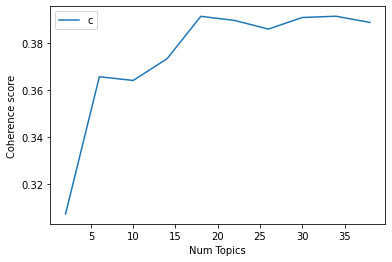

In [ ]:
# Show graph
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
print(f'''The {x[best_result_index]} topics gives the highest coherence score \
of {coherence_values[best_result_index]}''')


The 34 topics gives the highest coherence score of 0.39124720419096853


/home/user/Data-science/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(22,
  '0.014*"law" + 0.014*"vote" + 0.014*"-" + 0.012*"issue" + 0.011*"public" + '
  '0.010*"report" + 0.010*"election" + 0.009*"case" + 0.008*"question" + '
  '0.008*"rule"'),
 (31,
  '0.059*"today" + 0.032*"free" + 0.024*"time" + 0.023*"arie" + 0.022*"play" + '
  '0.017*"hot" + 0.015*"day" + 0.012*"wait" + 0.012*"ready" + 0.011*"size"'),
 (17,
  '0.084*"late" + 0.040*"news" + 0.033*"work" + 0.032*"email" + 0.030*"send" + '
  '0.022*"online" + 0.019*"update" + 0.019*"link" + 0.018*"app" + '
  '0.016*"daily"'),
 (12,
  '0.019*"work" + 0.013*"time" + 0.011*"phone" + 0.008*"thing" + '
  '0.008*"awesome" + 0.007*"car" + 0.007*"build" + 0.007*"good" + 0.006*"open" '
  '+ 0.006*"code"'),
 (2,
  '0.016*"car" + 0.014*"day" + 0.013*"rain" + 0.013*"weather" + '
  '0.013*"morning" + 0.012*"road" + 0.010*"wind" + 0.010*"drive" + 0.009*"bus" '
  '+ 0.009*"snow"'),
 (25,
  '0.096*"video" + 0.031*"music" + 0.029*"win" + 0.023*"play" + 0.022*"add" + '
  '0.022*"enter" + 0.018*"live" + 0.016*"song" 

/home/user/Data-science/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def convertldaGenToldaMallet(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(optimal_model)

/home/user/Data-science/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pickle.dump(optimal_model, open('optimal_lda_model', 'wb'))
pickle.dump(corpus, open('corpus', 'wb'))
pickle.dump(id2word, open('id2word', 'wb'))

/home/user/Data-science/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
p 

/home/user/Data-science/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/user/Data-science/env/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/home/user/Data-science/env/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/home/user/Data-science/env/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
33    -0.096149  0.197462       1        1  4.159423
24     0.259101  0.054675       2        1  4.045018
30    -0.007443  0.078901       3        1  3.919750
3      0.169188  0.163670       4        1  3.884818
29    -0.267429 -0.014586       5        1  3.797232
14    -0.006073  0.057795       6        1  3.542770
32    -0.142405  0.128390       7        1  3.522947
22     0.250812 -0.019276       8        1  3.438847
8     -0.120174  0.064049       9        1  3.384425
4      0.106595 -0.156035      10        1  3.365674
7      0.089420  0.161599      11        1  3.359396
9      0.244267 -0.075650      12        1  3.320005
20     0.175388 -0.180288      13        1  3.291227
23    -0.170172  0.027252      14        1  3.218553
0     -0.122017  0.144016      15        1  3.178970
6     -0.100870  0.189057      16        1  3.172731
11    -0.016570 -0.026599      17        1  2.997636
18     0.104436  0.143449      18        1  2.987177
2     -0.050279 -0.003101      19        1  2.922218
12     0.020775  0.010276      20        1  2.764673
26    -0.087138  0.032463      21        1  2.763121
13     0.069672 -0.011705      22        1  2.606726
5     -0.014476 -0.043382      23        1  2.591204
27     0.057565  0.022371      24        1  2.552734
19     0.212282 -0.103484      25        1  2.531165
25    -0.028968  0.074012      26        1  2.407529
10    -0.044193 -0.067212      27        1  2.292690
15    -0.162466 -0.169872      28        1  2.252228
17     0.062704 -0.013164      29        1  2.121088
28    -0.099836 -0.190910      30        1  2.111270
21    -0.091225 -0.208437      31        1  2.054063
1     -0.093413 -0.183744      32        1  1.972648
31    -0.131522 -0.161098      33        1  1.779959
16     0.030613  0.079109      34        1  1.690082, topic_info=          Term          Freq         Total Category  logprob  loglift
183       love  19247.000000  19247.000000  Default  30.0000  30.0000
627      today  19578.000000  19578.000000  Default  29.0000  29.0000
231     people  19140.000000  19140.000000  Default  28.0000  28.0000
135      great  18676.000000  18676.000000  Default  27.0000  27.0000
72         day  20906.000000  20906.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
2868  complete     92.110080   1356.801683  Topic34  -6.2472   1.3905
132       good    186.778784  29488.497334  Topic34  -5.5402  -0.9814
195       miss    116.416913   4430.088162  Topic34  -6.0130   0.4414
353       true    111.299678   3606.921800  Topic34  -6.0579   0.6020
1135   weekend     97.227310   2936.365245  Topic34  -6.1931   0.6725

[3687 rows x 6 columns], token_table=       Topic      Freq Term
term                       
0          1  0.049107   'd
0          3  0.360916   'd
0          7  0.142078   'd
0         11  0.042909   'd
0         15  0.040049   'd
...      ...       ...  ...
48348     11  0.997528    ╬
13055     29  1.004861    ▸
7894       3  0.006303    ♫
7894      22  0.006303    ♫
7894      26  0.983309    ♫

[8895 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[34, 25, 31, 4, 30, 15, 33, 23, 9, 5, 8, 10, 21, 24, 1, 7, 12, 19, 3, 13, 27, 14, 6, 28, 20, 26, 11, 16, 18, 29, 22, 2, 32, 17])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87197226-98be-42b2-8527-389082831299' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>